# <center> PHYS-300 Computational Methods in Physics

---

# Investigating Deterministic Chaos in Three-Body Systems  
### Colby Ramsey & Feras Natsheh  
#### Final Project
#### Fall 2023

Unless Manim is downloaded on your computer, this should be run on Google Colab, which has Manim built in.

---

In [ ]:
# The incredibly powerful forces
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

**Python Libraries**

To run this locally, you would **need to install Manim locally** through a process detailed on the Manim website. However, to run it on a virtual service like Google Colab, you can run it using one simple !pip code chunk.

On Google Colab, try importing manim through the "from Main import *" cell, if that does not work, uncomment and run the next code chunk "!sudo apt update.." It will take a few minutes then it will ask you to restart the runtime. After that, running the Main import should work. More instructions on importing Manim [here](https://docs.manim.community/en/stable/installation/jupyter.html).



In [ ]:
from manim import *

Manim Community v0.18.0

In [ ]:
"""!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade

SyntaxError: ignored

---
## Overview

Kepler's laws of planetary motion showed us that orbits are ellipses with the Sun at one focus, and that an object in orbit sweeps equal areas in equal time intervals.

Building on Kepler's foundation, we move on to exploring Newton's Law of Universal Gravitation. Newton provided a mathematical framework to understand binary gravitational interactions. However, extending these principles to systems with more than two bodies (where $N > 2$) poses significant challenges due to the absence of a singular, comprehensive formula to accurately describe the interactions in such systems. We can, however, describe a three-body system using a set of differential equations.

Our approach is inspired by a textbook problem, where we utilize a set of differential equations to model a three-body problem. After the physics is derived, we attempt to visualize the motion of  the three-body system in the textbook problem. We then move to generalizing the Three-Body System by exploring the sensitivity of these systems to variations in initial conditions, specifically focusing on the parameters of mass and position. Finally, attempt to draw connections to the concept of Deterministic Chaos, thereby illuminating the intricate and often unpredictable nature of three-body gravitational dynamics.

---
## The Physics

### Inspired by Newman 8.16


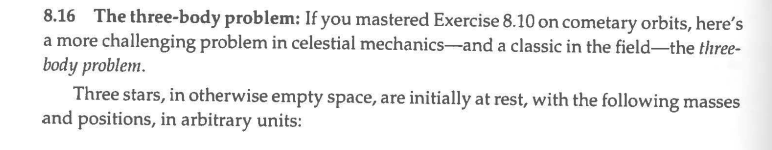

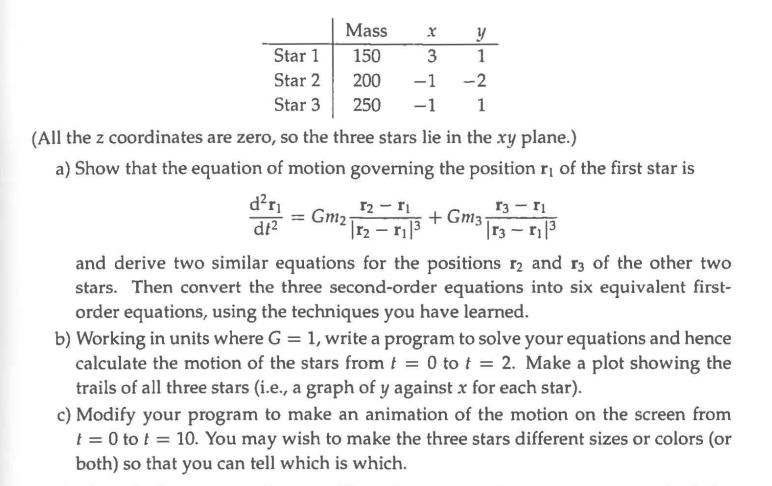

### Let's start by deriving the Differential Equations governing this system




Starting from Newton's law of universal gravitation, which states that every point mass attracts every other point mass by a force acting along the line intersecting both points. The force is proportional to the product of the two masses and inversely proportional to the square of the distance between them.

For any arbitrary two bodies gravitationally interacting, the general form of Newton's gravitational law is:
$$\mathbf{F} = G\frac{m_1m_2}{\mathbf{r}^2}$$
$$a_1=\frac{\mathbf{F}}{m_1}=G\frac{m_2}{\mathbf{r}^2}$$

But let's consider three bodies. We have two force vectors acting on each body. Let's take body 1:
$$\mathbf{F_{12}} = G \frac{m_1m_2}{|\mathbf{r_2}-\mathbf{r_1}|^3}(\mathbf{r_2}-\mathbf{r_1})$$

$$\mathbf{F_{13}} = G \frac{m_1m_3}{|\mathbf{r_3}-\mathbf{r_1}|^3}(\mathbf{r_3}-\mathbf{r_1})$$

The Net force on body 1 is:

$$\mathbf{F_{net}} = \mathbf{F_{12}} +\mathbf{F_{13}} = m_1 \frac{d^2\mathbf{r_1}}{dt^2}$$

From this we can acquire the second-order differential form:

$$\frac{d^2\mathbf{r_1}}{dt^2} = G\frac{m_2}{|\mathbf{r_2}-\mathbf{r_1}|^3}(\mathbf{r_2}-\mathbf{r_1}) + G\frac{m_3}{|\mathbf{r_3}-\mathbf{r_1}|^3}(\mathbf{r_3}-\mathbf{r_1})$$

Define velocity as
$$\mathbf{v_1} = \frac{d\mathbf{r_1}}{dt}$$
Then we can rewrite our second-order DE as two first-order DE's:
$$\mathbf{v_1} = \frac{d\mathbf{r_1}}{dt}$$
$$\frac{d\mathbf{v_1}}{dt} = G\frac{m_2}{|\mathbf{r_2}-\mathbf{r_1}|^3}(\mathbf{r_2}-\mathbf{r_1}) + G\frac{m_3}{|\mathbf{r_3}-\mathbf{r_1}|^3}(\mathbf{r_3}-\mathbf{r_1})$$

#### Similarly, we apply the same two procedure for bodies 2 & 3, we end up with **six** first-order DE's

---
#### First, let's attempt coding up our own solver

In [ ]:
### Constants ###
G = 1                         # Simplified Gravitational Constant
N = 1000                      # Number of steps
mass_list = [150, 200, 250]   # Masses of the three bodies, respectively
dt = 20/N                     # Size of each step
t_span = (0, 20)              # Integration limits (start time, end time)
t_arr = np.linspace(0, 2, N)  # Time Array for RK45

### Initial Conditions ###
r1_0 = np.array([3, 1])
v1_0 = np.array([0, 0])

r2_0 = np.array([-1, -2])
v2_0 = np.array([0, 0])

r3_0 = np.array([-1, 1])
v3_0 = np.array([0, 0])

# Necessary because solve_ivp requires the initial conditions to be passed as a one-dimensional array.
initial_conditions = np.concatenate((r1_0, v1_0, r2_0, v2_0, r3_0, v3_0))

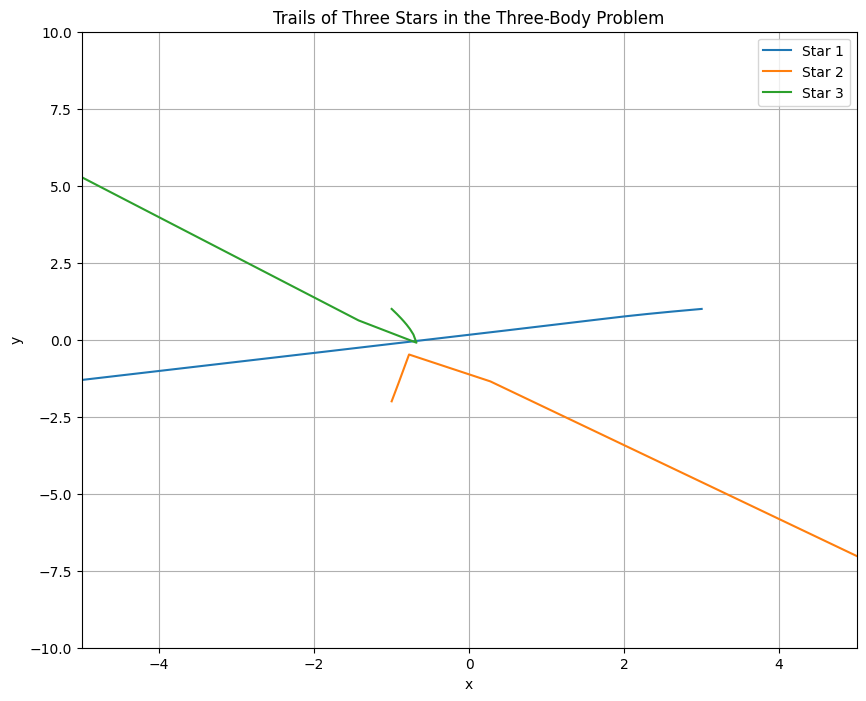

In [ ]:
### Define motion equations for our RK45 solver ###
def three_body_RK45(state):
    r1, r2, r3 = state[0:2], state[4:6], state[8:10]
    v1, v2, v3 = state[2:4], state[6:8], state[10:12]

    dr1_dt = v1
    dr2_dt = v2
    dr3_dt = v3

    dv1_dt = G * mass_list[1] * (r2 - r1) / np.linalg.norm(r2 - r1)**3 + \
             G * mass_list[2] * (r3 - r1) / np.linalg.norm(r3 - r1)**3
    dv2_dt = G * mass_list[0] * (r1 - r2) / np.linalg.norm(r1 - r2)**3 + \
             G * mass_list[2] * (r3 - r2) / np.linalg.norm(r3 - r2)**3
    dv3_dt = G * mass_list[0] * (r1 - r3) / np.linalg.norm(r1 - r3)**3 + \
             G * mass_list[1] * (r2 - r3) / np.linalg.norm(r2 - r3)**3

    derivatives = np.concatenate((dr1_dt, dv1_dt, dr2_dt, dv2_dt, dr3_dt, dv3_dt))

    return derivatives

### RK45 Method ###
def RK45(state, dt):

  k1 = dt * three_body_RK45(state)
  k2 = dt * three_body_RK45(state + k1/2)
  k3 = dt * three_body_RK45(state + k2/2)
  k4 = dt * three_body_RK45(state + k3)

  new_state = state + (k1 + 2*k2 + 2*k3 + k4) / 6

  return new_state

def compute_trajectory():
  t = 0
  trajectory = []
  state = initial_conditions

  for t in t_arr:
    trajectory.append(state)
    state = RK45(state, dt)
    t += dt

  return np.array(trajectory)

traj = compute_trajectory()

r1_traj = traj[:, 0:2]
r2_traj = traj[:, 4:6]
r3_traj = traj[:, 8:10]

### Now let's plot it ###
plt.figure(figsize=(10, 8))
plt.plot(r1_traj[:, 0], r1_traj[:, 1], label='Star 1')
plt.plot(r2_traj[:, 0], r2_traj[:, 1], label='Star 2')
plt.plot(r3_traj[:, 0], r3_traj[:, 1], label='Star 3')
plt.xlabel('x')
plt.xlim(-5,5)
plt.ylim(-10,10)
plt.ylabel('y')
plt.title('Trails of Three Stars in the Three-Body Problem')
plt.legend()
plt.grid(True)

As the plot shows, we end up with a very inaccurate plot of the trajectories of the three bodies. This could be due to either an accuracy issue in our solver, or the way our arrays store and extract data.

After some debugging and some research, we decided to proceed using the Scipy library to solve our differential equations.

#### Now let's try plotting it using the finely optimized solve_ivp from scipy.integrate

In [ ]:
def three_body_equations(t, y, masses):
    r1, r2, r3 = y[0:2], y[4:6], y[8:10]
    v1, v2, v3 = y[2:4], y[6:8], y[10:12]

    dr1_dt = v1
    dr2_dt = v2
    dr3_dt = v3

    dv1_dt = G * masses[1] * (r2 - r1) / np.linalg.norm(r2 - r1)**3 + \
             G * masses[2] * (r3 - r1) / np.linalg.norm(r3 - r1)**3
    dv2_dt = G * masses[0] * (r1 - r2) / np.linalg.norm(r1 - r2)**3 + \
             G * masses[2] * (r3 - r2) / np.linalg.norm(r3 - r2)**3
    dv3_dt = G * masses[0] * (r1 - r3) / np.linalg.norm(r1 - r3)**3 + \
             G * masses[1] * (r2 - r3) / np.linalg.norm(r2 - r3)**3

    derivatives = np.concatenate((dr1_dt, dv1_dt, dr2_dt, dv2_dt, dr3_dt, dv3_dt))

    return derivatives

solution_2s = solve_ivp(lambda t, y: three_body_equations(t, y, mass_list), t_span, initial_conditions, method='RK45', t_eval=np.linspace(0, 2, N))

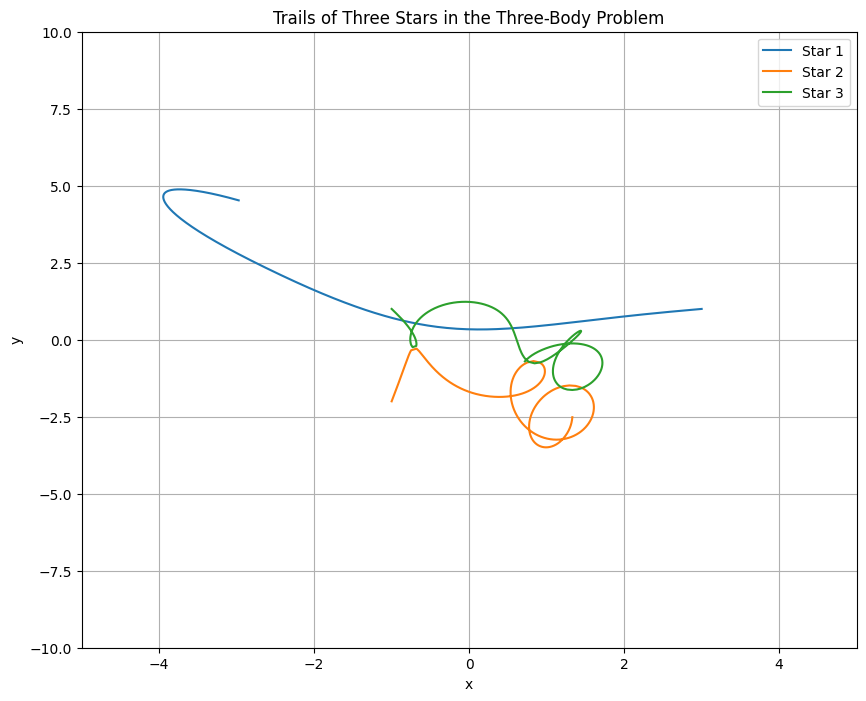

In [ ]:
### N = 1000 ####

r1_sol = solution_2s.y[0:2, :]
r2_sol = solution_2s.y[4:6, :]
r3_sol = solution_2s.y[8:10, :]


plt.figure(figsize=(10, 8))
plt.plot(r1_sol[0], r1_sol[1], label='Star 1')
plt.plot(r2_sol[0], r2_sol[1], label='Star 2')
plt.plot(r3_sol[0], r3_sol[1], label='Star 3')
plt.xlabel('x')
plt.xlim(-5,5)
plt.ylim(-10,10)
plt.ylabel('y')
plt.title('Trails of Three Stars in the Three-Body Problem')
plt.legend()
plt.grid(True)

#### solve_ivp from scipy.integrate seems to work well! We will proceed with this solver because it allows us to plot cool stuff with decent accuracy.

---
#### Implementing Object-Oriented Programming to visualize the trajectories

We used the Python library Manim because it is fairly easy to use to create very cool .mp4 animations of the system over t seconds.

 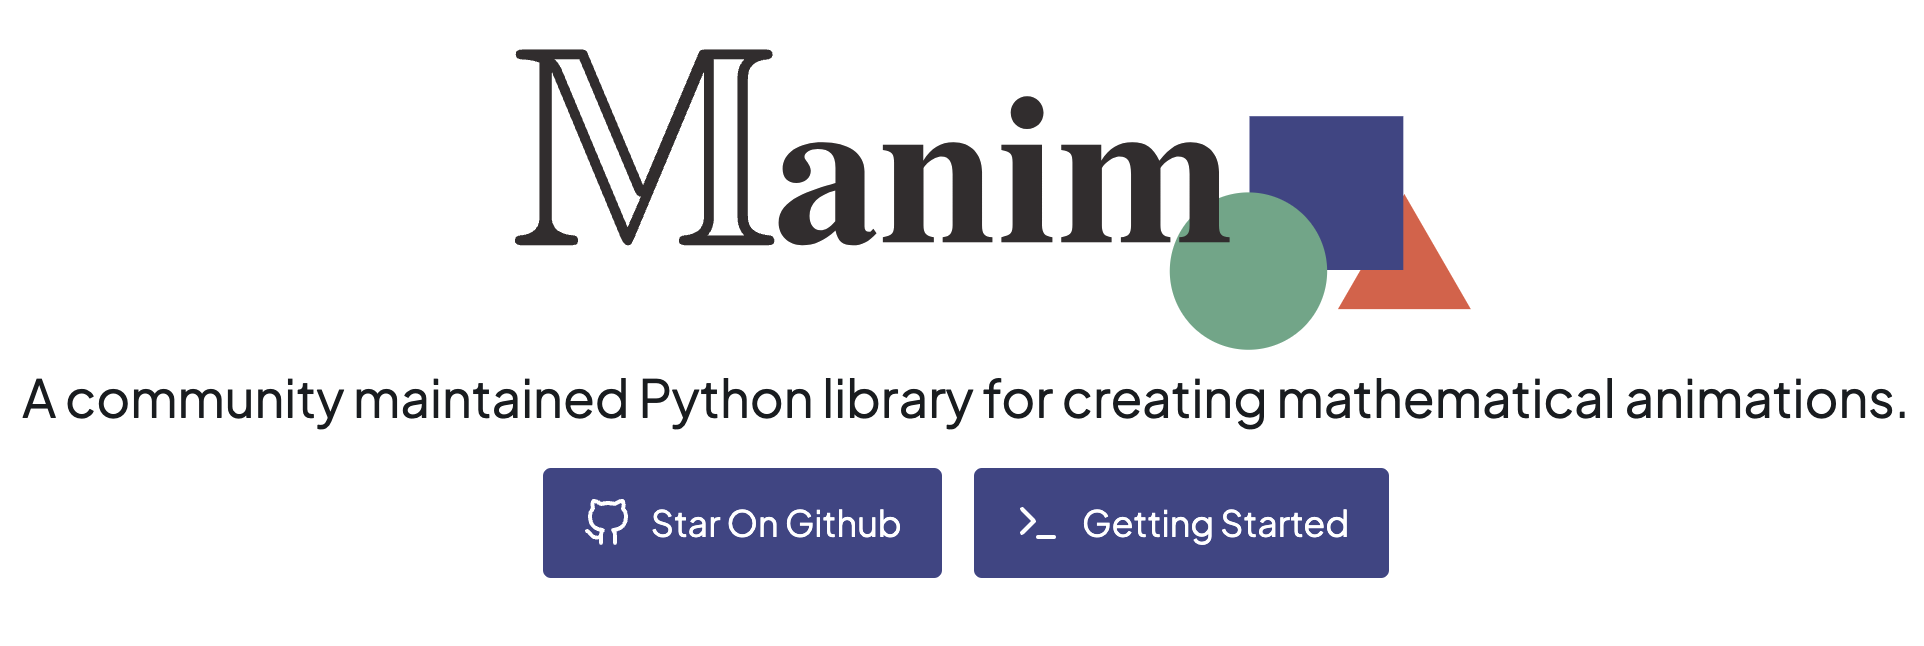

#### Let's run the 2 seconds animation

In [ ]:
%%manim -qm -v WARNING ThreeBodyAnimation

# Transform the trajectory arrays into readable format for Manim
r1_trajectory = [[x, y, 0] for x, y in zip(r1_sol[0, :], r1_sol[1, :])]
r2_trajectory = [[x, y, 0] for x, y in zip(r2_sol[0, :], r2_sol[1, :])]
r3_trajectory = [[x, y, 0] for x, y in zip(r3_sol[0, :], r3_sol[1, :])]


class ThreeBodyAnimation(Scene):
    def construct(self):
        star1 = Dot(radius=0.1, color=BLUE)
        star2 = Dot(radius=0.15, color=RED)
        star3 = Dot(radius=0.2, color=GREEN)

        # Initial positions of stars
        star1.move_to(r1_trajectory[0])
        star2.move_to(r2_trajectory[0])
        star3.move_to(r3_trajectory[0])

        self.add(star1, star2, star3)

        r1_path = VMobject() # vectorized object
        r1_path.set_points_as_corners([*r1_trajectory])

        r2_path = VMobject()
        r2_path.set_points_as_corners([*r2_trajectory])

        r3_path = VMobject()
        r3_path.set_points_as_corners([*r3_trajectory])

        self.play(
            MoveAlongPath(star1, r1_path),
            MoveAlongPath(star2, r2_path),
            MoveAlongPath(star3, r3_path),
            run_time=2,
            rate_func=linear
        )

        self.wait()


#### Let's make it a little cooler by adding traced paths and a grid

In [ ]:
%%manim -qm -v WARNING AnimationWithGrid

class AnimationWithGrid(Scene):
    def construct(self):

        grid = NumberPlane() # add grid
        self.add(grid)

        star1 = Dot(radius=0.1, color=BLUE)
        star2 = Dot(radius=0.13, color=RED)
        star3 = Dot(radius=0.16, color=GREEN)

        star1.move_to(r1_trajectory[0])
        star2.move_to(r2_trajectory[0])
        star3.move_to(r3_trajectory[0])

        self.add(star1, star2, star3)

        # traced paths
        traced_path1 = TracedPath(star1.get_center, stroke_color=BLUE, stroke_opacity=1)
        traced_path2 = TracedPath(star2.get_center, stroke_color=RED, stroke_opacity=1)
        traced_path3 = TracedPath(star3.get_center, stroke_color=GREEN, stroke_opacity=1)

        self.add(traced_path1, traced_path2, traced_path3)

        r1_path = VMobject().set_points_as_corners([*r1_trajectory])
        r2_path = VMobject().set_points_as_corners([*r2_trajectory])
        r3_path = VMobject().set_points_as_corners([*r3_trajectory])

        self.play(
            MoveAlongPath(star1, r1_path, rate_func=linear),
            MoveAlongPath(star2, r2_path, rate_func=linear),
            MoveAlongPath(star3, r3_path, rate_func=linear),
            run_time=2,
            rate_func=linear)

        self.wait()


We notice the issue that some of the bodies are lagging behind at various times. The final snapshot of the traced paths is an accurate representation of the trajectories of the three bodies, but their motion is a little jagged. We investigate this issue by increasing the number of points  $N$.  

In [ ]:
### animating solution_highN, N = 5000 ###

%%manim -qm -v WARNING SolutionOfHighN

solution_highN = solve_ivp(lambda t, y: three_body_equations(t, y, mass_list), t_span, initial_conditions, method='RK45', t_eval=np.linspace(0, 2, 5000))

r1_solns = solution_highN.y[0:2, :]
r2_solns = solution_highN.y[4:6, :]
r3_solns = solution_highN.y[8:10, :]

r1_trajectory_highN = [[x, y, 0] for x, y in zip(r1_solns[0, :], r1_solns[1, :])]
r2_trajectory_highN = [[x, y, 0] for x, y in zip(r2_solns[0, :], r2_solns[1, :])]
r3_trajectory_highN = [[x, y, 0] for x, y in zip(r3_solns[0, :], r3_solns[1, :])]

class SolutionOfHighN(Scene):
    def construct(self):

        grid = NumberPlane()
        self.add(grid)

        star1 = Dot(radius=0.1, color=BLUE)
        star2 = Dot(radius=0.13, color=RED)
        star3 = Dot(radius=0.16, color=GREEN)

        star1.move_to(r1_trajectory_highN[0])
        star2.move_to(r2_trajectory_highN[0])
        star3.move_to(r3_trajectory_highN[0])

        self.add(star1, star2, star3)

        traced_path1 = TracedPath(star1.get_center, stroke_color=BLUE, stroke_opacity=1)
        traced_path2 = TracedPath(star2.get_center, stroke_color=RED, stroke_opacity=1)
        traced_path3 = TracedPath(star3.get_center, stroke_color=GREEN, stroke_opacity=1)

        self.add(traced_path1, traced_path2, traced_path3)

        r1_path = VMobject().set_points_as_corners([*r1_trajectory_highN])
        r2_path = VMobject().set_points_as_corners([*r2_trajectory_highN])
        r3_path = VMobject().set_points_as_corners([*r3_trajectory_highN])

        self.play(
            MoveAlongPath(star1, r1_path, rate_func=linear),
            MoveAlongPath(star2, r2_path, rate_func=linear),
            MoveAlongPath(star3, r3_path, rate_func=linear),
            run_time=2,
            rate_func=linear)

        self.wait()

#### As the animation shows, it doesn't seem to be an issue of accuracy. So we will move on and discard the lag

---

### Run the same animation for 10 seconds

In [ ]:
solution_10s = solve_ivp(lambda t, y: three_body_equations(t, y, mass_list), t_span, initial_conditions, method='RK45', t_eval=np.linspace(0, 10, 1000))

r1_trajectory_10s = [[x, y, 0] for x, y in zip(solution_10s.y[0, :], solution_10s.y[1, :])]
r2_trajectory_10s = [[x, y, 0] for x, y in zip(solution_10s.y[4, :], solution_10s.y[5, :])]
r3_trajectory_10s = [[x, y, 0] for x, y in zip(solution_10s.y[8, :], solution_10s.y[9, :])]

In [ ]:
%%manim -ql -v WARNING GridTenSeconds

class GridTenSeconds(Scene):
    def construct(self):

        grid = NumberPlane()
        self.add(grid)

        star1 = Dot(radius=0.1, color=BLUE)
        star2 = Dot(radius=0.13, color=RED)
        star3 = Dot(radius=0.16, color=GREEN)

        star1.move_to(r1_trajectory_10s[0])
        star2.move_to(r2_trajectory_10s[0])
        star3.move_to(r3_trajectory_10s[0])

        self.add(star1, star2, star3)

        # Traced paths
        traced_path1 = TracedPath(star1.get_center, stroke_color=BLUE, stroke_opacity=1.0)
        traced_path2 = TracedPath(star2.get_center, stroke_color=RED, stroke_opacity=1.0)
        traced_path3 = TracedPath(star3.get_center, stroke_color=GREEN, stroke_opacity=1.0)

        self.add(traced_path1, traced_path2, traced_path3)

        r1_path = VMobject().set_points_as_corners([*r1_trajectory_10s])
        r2_path = VMobject().set_points_as_corners([*r2_trajectory_10s])
        r3_path = VMobject().set_points_as_corners([*r3_trajectory_10s])

        self.play(
            MoveAlongPath(star1, r1_path, rate_func=linear),
            MoveAlongPath(star2, r2_path, rate_func=linear),
            MoveAlongPath(star3, r3_path, rate_func=linear),
            run_time=20,
            rate_func=linear)

        self.wait()

#### The same system, over a 10-second interval, seems to exhibit a totally different behavior, which is quite interesting. We know to expect different behaviors depending on the initial conditions, but the initial conditions were not changed in this run, so it might be an overflow issue, since we're running the animation for 10 seconds and stretching it out for 20 seconds.

---
#### Let's try to model something more familiar with this simplified approach
### Sun-Jupiter-Earth as a Three-Body System

Scaling down the system: Jupiter is about 0.09% the mass of the Sun, while Earh is 0.0003% the mass of the Sun.

Earth-Sun distance is 1 AU, while Sun-Jupiter is 5.2 AU

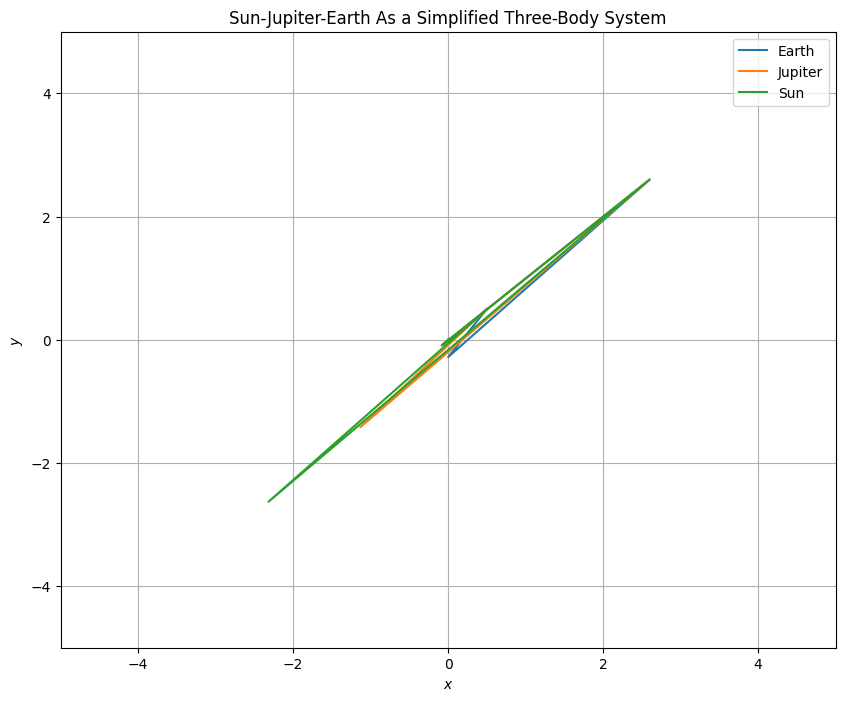

In [ ]:
### Initial Conditions ###

SJE_mass = [0.03, 9, 100]

re_0 = np.array([0.5, 0.5])
ve_0 = np.array([0, 0])

rj_0 = np.array([2.6, 2.6])
vj_0 = np.array([0, 0])

rs_0 = np.array([0, 0])
vs_0 = np.array([0, 0])

initial_conditions_SJE = np.concatenate((re_0, ve_0, rj_0, vj_0, rs_0, vs_0))

solution_SJE = solve_ivp(lambda t, y: three_body_equations(t, y, SJE_mass), t_span, initial_conditions_SJE, method='RK45', t_eval=np.linspace(0, 2, N))

re_traj = solution_SJE.y[:, 0:2]
rj_traj = solution_SJE.y[:, 4:6]
rs_traj = solution_SJE.y[:, 8:10]

plt.figure(figsize=(10, 8))
plt.plot(re_traj[:, 0], re_traj[:, 1], label='Earth')
plt.plot(rj_traj[:, 0], rj_traj[:, 1], label='Jupiter')
plt.plot(rs_traj[:, 0], rs_traj[:, 1], label='Sun')
plt.xlabel('$x$')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.ylabel('$y$')
plt.title('Sun-Jupiter-Earth As a Simplified Three-Body System')
plt.legend()
plt.grid(True)

In [ ]:
%%manim -qm -v WARNING SunJupiterEarth

re_trajectory = [[x, y, 0] for x, y in zip(solution_SJE.y[0, :], solution_SJE.y[1, :])]
rj_trajectory = [[x, y, 0] for x, y in zip(solution_SJE.y[4, :], solution_SJE.y[5, :])]
rs_trajectory = [[x, y, 0] for x, y in zip(solution_SJE.y[8, :], solution_SJE.y[9, :])]


class SunJupiterEarth(Scene):
    def construct(self):

        grid = NumberPlane()
        self.add(grid)

        star1 = Dot(radius=0.1, color=BLUE)
        star2 = Dot(radius=0.15, color=RED)
        star3 = Dot(radius=0.2, color=YELLOW)

        star1.move_to(re_trajectory[0])
        star2.move_to(rj_trajectory[0])
        star3.move_to(rs_trajectory[0])

        self.add(star1, star2, star3)

        # Traced paths
        traced_path1 = TracedPath(star1.get_center, stroke_color=BLUE, stroke_opacity=1.0)
        traced_path2 = TracedPath(star2.get_center, stroke_color=RED, stroke_opacity=1.0)
        traced_path3 = TracedPath(star3.get_center, stroke_color=YELLOW, stroke_opacity=1.0)

        self.add(traced_path1, traced_path2, traced_path3)

        r1_path = VMobject().set_points_as_corners([*re_trajectory])
        r2_path = VMobject().set_points_as_corners([*rj_trajectory])
        r3_path = VMobject().set_points_as_corners([*rs_trajectory])

        self.play(
            MoveAlongPath(star1, r1_path, rate_func=linear),
            MoveAlongPath(star2, r2_path, rate_func=linear),
            MoveAlongPath(star3, r3_path, rate_func=linear),
            run_time=2,
            rate_func=linear)

        self.wait()

We can see that this is not accurately modeled. There are likely many factors coming into play. Having a simplified gravitational constant very likely causes issues when paired with approximate masses and no initial velocities. Additionally, having an N that is not very large may not show the true behavior of the system. The plot above shows movement of multiple bodies, whereas this animation only shows movement of one.

---
## Chaotic Behavior

We're interested in the chaotic behavior of three-body systems, so let's explore the deterministic chaos in those systems.

Below is a plot where we vary the mass of the first body over a 100 evenly spaced masses between 50 and 500, while holding the other two bodies at the same mass throughout. The resulting plot is of the change in final position of the first body based on its mass. Only the x-position is plotted for simplicity. The graph shows the final x-position of the first body in relation to its varying mass.

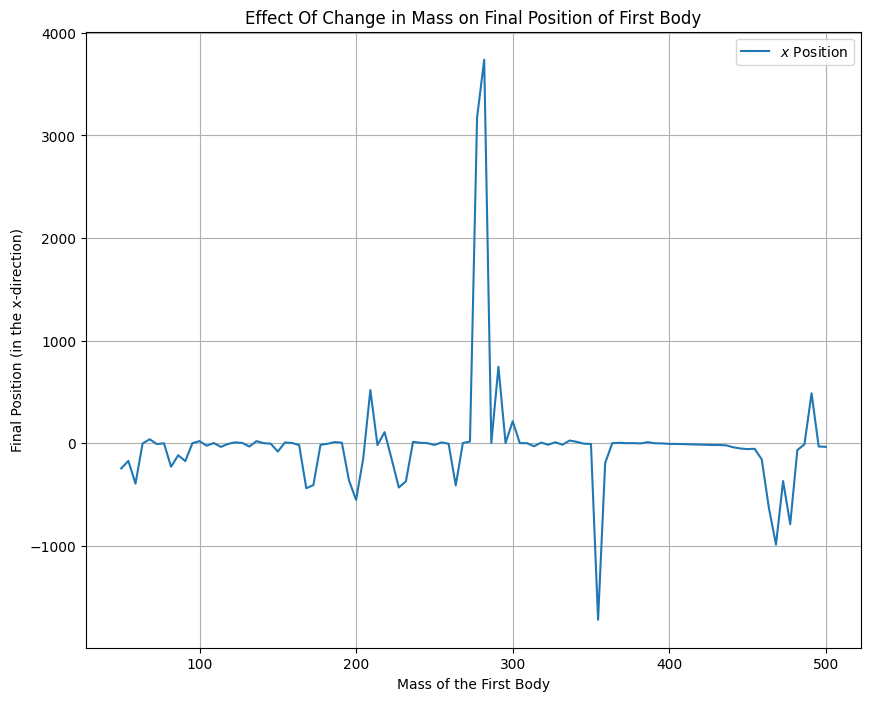

In [ ]:
N_pts = 100
final_positions = np.zeros((N_pts, 2))  # To store final positions for each simulation
masses = np.linspace(50, 500, N_pts)    # Evenly spaced masses ranging from 50 to 500

for i in range(N_pts):
    mass_list[0] = masses[i] # Updates the mass of the first body for each simulation
    solution_N_pts = solve_ivp(lambda t, y: three_body_equations(t, y, mass_list), t_span, initial_conditions, method='RK45', t_eval=np.linspace(0, 20, 500))
    r1_solution = solution_N_pts.y[0:2, :] # Extract position
    final_positions[i] = r1_solution[:, -1] # Store final position of each iteration

# Lets plot it now
plt.figure(figsize=(10, 8))
plt.plot(masses, final_positions[:, 0], label='$x$ Position')
plt.xlabel('Mass of the First Body')
plt.ylabel('Final Position (in the x-direction)')
plt.title('Effect Of Change in Mass on Final Position of First Body')
plt.legend()
plt.grid(True)

#### And here are three combined plots where we run the same procedure for bodies 2 & 3

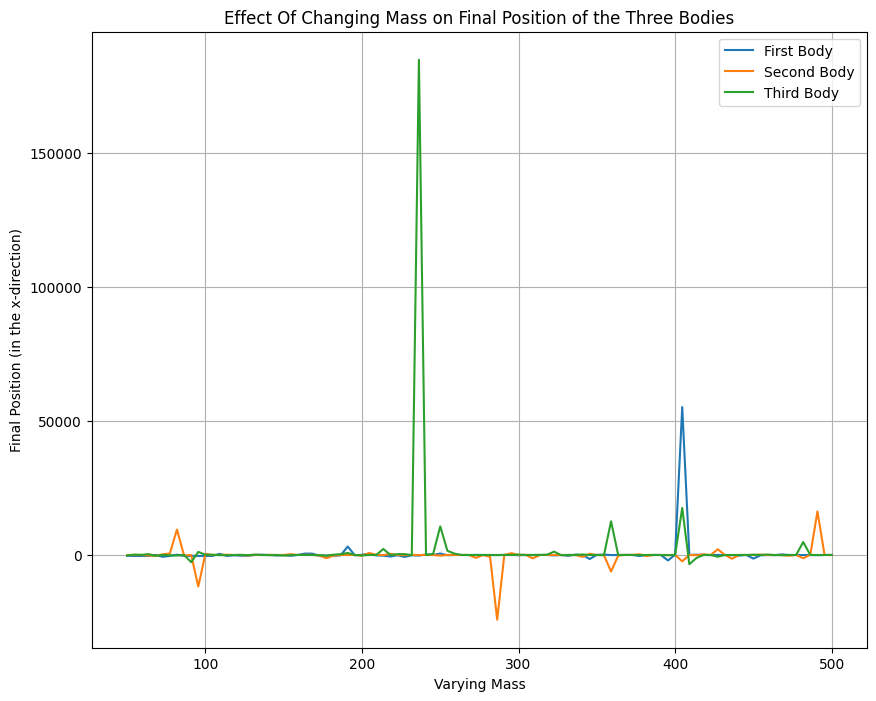

In [ ]:
final_positions_1 = np.zeros((N_pts, 2))
final_positions_2 = np.zeros((N_pts, 2))
final_positions_3 = np.zeros((N_pts, 2))

for i in range(N_pts):
  mass_list[0] = masses[i]
  solution_N_pts = solve_ivp(lambda t, y: three_body_equations(t, y, mass_list), t_span, initial_conditions, method='RK45', t_eval=np.linspace(0, 20, N))
  r1_solution = solution_N_pts.y[0:2, :]
  final_positions_1[i] = r1_solution[:, -1]

for i in range(N_pts):
  mass_list[1] = masses[i]
  solution_N_pts = solve_ivp(lambda t, y: three_body_equations(t, y, mass_list), t_span, initial_conditions, method='RK45', t_eval=np.linspace(0, 20, N))
  r2_solution = solution_N_pts.y[4:6, :]
  final_positions_2[i] = r2_solution[:, -1]

for i in range(N_pts):
  mass_list[2] = masses[i]
  solution_N_pts = solve_ivp(lambda t, y: three_body_equations(t, y, mass_list), t_span, initial_conditions, method='RK45', t_eval=np.linspace(0, 20, N))
  r3_solution = solution_N_pts.y[8:10, :]
  final_positions_3[i] = r3_solution[:, -1]

plt.figure(figsize=(10, 8))
plt.plot(masses, final_positions_1[:, 0], label='First Body')
plt.plot(masses, final_positions_2[:, 0], label='Second Body')
plt.plot(masses, final_positions_3[:, 0], label='Third Body')
plt.xlabel('Varying Mass')
plt.ylabel('Final Position (in the x-direction)')
plt.title('Effect Of Changing Mass on Final Position of the Three Bodies')
plt.legend()
plt.grid(True)

#### Here is another condensed view of the plots for comparison

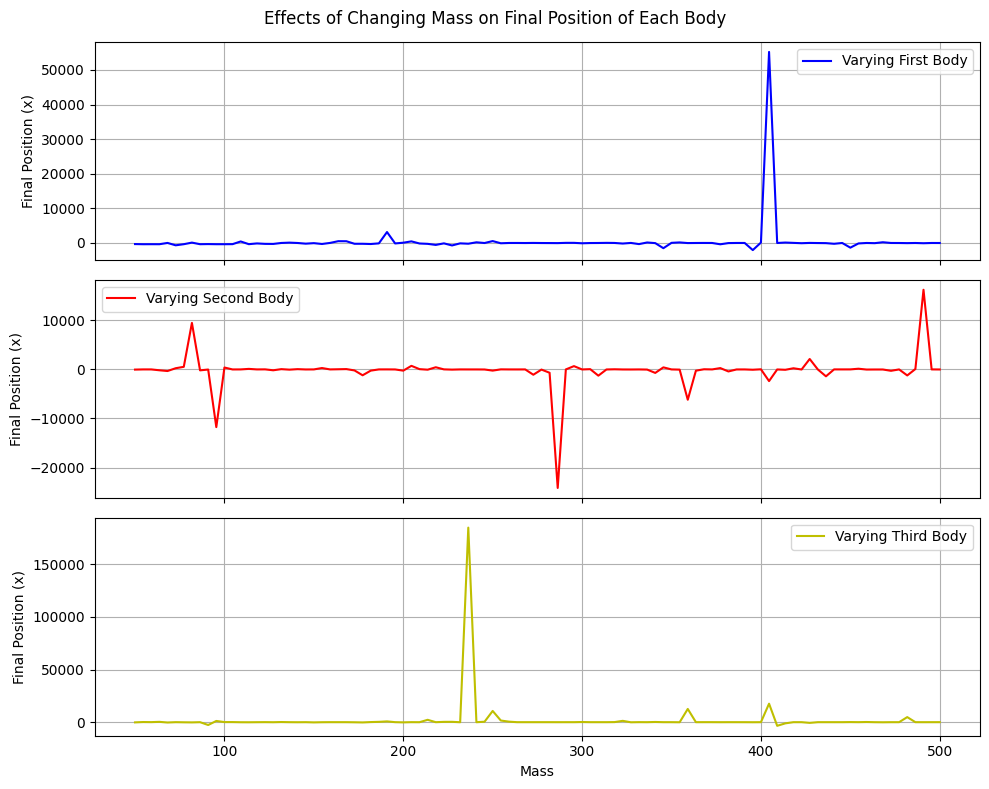

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10,8), sharex=True)

axes[0].plot(masses, final_positions_1[:,0], 'b', label='Varying First Body')
axes[0].set_ylabel('Final Position (x)')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(masses, final_positions_2[:,0], 'r', label='Varying Second Body')
axes[1].set_ylabel('Final Position (x)')
axes[1].legend()
axes[1].grid(True)

axes[2].plot(masses, final_positions_3[:,0], 'y', label='Varying Third Body')
axes[2].set_xlabel('Mass')
axes[2].set_ylabel('Final Position (x)')
axes[2].legend()
axes[2].grid(True)

plt.suptitle('Effects of Changing Mass on Final Position of Each Body')
plt.tight_layout()


---
### Identical Masses!

#### The following is an animation of the three-body system when the masses are identical and form a triangle of length ratio 3:4:5

In [ ]:
identical_mass = [200, 200, 200]

### Initial Positions form a 3:4:5 triangle ###
r1i_0 = np.array([-2, -2])
v1i_0 = np.array([0, 0])

r2i_0 = np.array([-2, 2])
v2i_0 = np.array([0, 0])

r3i_0 = np.array([1, 2])
v3i_0 = np.array([0, 0])

initial_conditions_triangle = np.concatenate((r1i_0, v1i_0, r2i_0, v2i_0, r3i_0, v3i_0))

solution_identical = solve_ivp(lambda t, y: three_body_equations(t, y, identical_mass), t_span, initial_conditions_triangle, method='RK45', t_eval=np.linspace(0, 2, 1000))

r1i_trajectory = [[x, y, 0] for x, y in zip(solution_identical.y[0, :], solution_identical.y[1, :])]
r2i_trajectory = [[x, y, 0] for x, y in zip(solution_identical.y[4, :], solution_identical.y[5, :])]
r3i_trajectory = [[x, y, 0] for x, y in zip(solution_identical.y[8, :], solution_identical.y[9, :])]

In [ ]:
%%manim -qm -v WARNING IdenticalMassTriangle

class IdenticalMassTriangle(Scene):
    def construct(self):

        grid = NumberPlane()
        self.add(grid)

        star1 = Dot(radius=0.1, color=BLUE)
        star2 = Dot(radius=0.1, color=RED)
        star3 = Dot(radius=0.1, color=YELLOW)

        star1.move_to(r1i_trajectory[0])
        star2.move_to(r2i_trajectory[0])
        star3.move_to(r3i_trajectory[0])

        self.add(star1, star2, star3)

        traced_path1 = TracedPath(star1.get_center, stroke_color=BLUE, stroke_opacity=1.0)
        traced_path2 = TracedPath(star2.get_center, stroke_color=RED, stroke_opacity=1.0)
        traced_path3 = TracedPath(star3.get_center, stroke_color=YELLOW, stroke_opacity=1.0)

        self.add(traced_path1, traced_path2, traced_path3)

        r1_path = VMobject().set_points_as_corners([*r1i_trajectory])
        r2_path = VMobject().set_points_as_corners([*r2i_trajectory])
        r3_path = VMobject().set_points_as_corners([*r3i_trajectory])

        self.play(
            MoveAlongPath(star1, r1_path),
            MoveAlongPath(star2, r2_path),
            MoveAlongPath(star3, r3_path),
            run_time=2,
            rate_func=linear)

        self.wait()

In [ ]:
identical_mass_100 = [100, 100, 100]

r1j_0 = np.array([-1, -2])
v1j_0 = np.array([0, 0])

r2j_0 = np.array([0, 1])
v2j_0 = np.array([0, 0])

r3j_0 = np.array([3, -1])
v3j_0 = np.array([0, 0])

initial_conditions_binary = np.concatenate((r1j_0, v1j_0, r2j_0, v2j_0, r3j_0, v3j_0))

solution_identical_binary = solve_ivp(lambda t, y: three_body_equations(t, y, identical_mass_100), t_span, initial_conditions_binary, method='RK45', t_eval=np.linspace(0, 10, 5000))

r1j_trajectory = [[x, y, 0] for x, y in zip(solution_identical_binary.y[0, :], solution_identical_binary.y[1, :])]
r2j_trajectory = [[x, y, 0] for x, y in zip(solution_identical_binary.y[4, :], solution_identical_binary.y[5, :])]
r3j_trajectory = [[x, y, 0] for x, y in zip(solution_identical_binary.y[8, :], solution_identical_binary.y[9, :])]

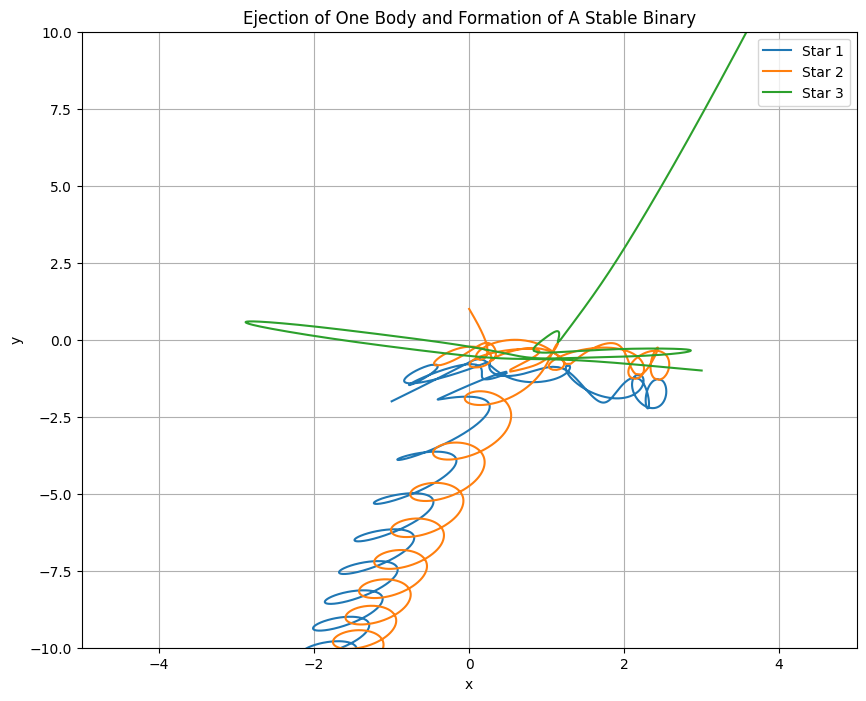

In [ ]:

r1j_sol = solution_identical_binary.y[0:2, :]
r2j_sol = solution_identical_binary.y[4:6, :]
r3j_sol = solution_identical_binary.y[8:10, :]

plt.figure(figsize=(10, 8))
plt.plot(r1j_sol[0], r1j_sol[1], label='Star 1')
plt.plot(r2j_sol[0], r2j_sol[1], label='Star 2')
plt.plot(r3j_sol[0], r3j_sol[1], label='Star 3')
plt.xlabel('x')
plt.xlim(-5,5)
plt.ylim(-10,10)
plt.ylabel('y')
plt.title('Ejection of One Body and Formation of A Stable Binary')
plt.legend()
plt.grid(True)

In [ ]:
%%manim -qm -v WARNING StableBinary

class StableBinary(Scene):
    def construct(self):

        grid = NumberPlane()
        self.add(grid)

        star1 = Dot(radius=0.1, color=BLUE)
        star2 = Dot(radius=0.1, color=RED)
        star3 = Dot(radius=0.1, color=YELLOW)

        star1.move_to(r1j_trajectory[0])
        star2.move_to(r2j_trajectory[0])
        star3.move_to(r3j_trajectory[0])

        self.add(star1, star2, star3)

        traced_path1 = TracedPath(star1.get_center, stroke_color=BLUE, stroke_opacity=1.0)
        traced_path2 = TracedPath(star2.get_center, stroke_color=RED, stroke_opacity=1.0)
        traced_path3 = TracedPath(star3.get_center, stroke_color=YELLOW, stroke_opacity=1.0)

        self.add(traced_path1, traced_path2, traced_path3)

        r1_path = VMobject().set_points_as_corners([*r1j_trajectory])
        r2_path = VMobject().set_points_as_corners([*r2j_trajectory])
        r3_path = VMobject().set_points_as_corners([*r3j_trajectory])

        self.play(
            MoveAlongPath(star1, r1_path),
            MoveAlongPath(star2, r2_path),
            MoveAlongPath(star3, r3_path),
            run_time=10,
            rate_func=linear)

        self.wait()

In [ ]:
N_pts = 100
mass_arr = np.linspace(50, 200, N_pts)

final_positions_identical_1 = np.zeros((N_pts, 2))
final_positions_identical_2 = np.zeros((N_pts, 2))
final_positions_identical_3 = np.zeros((N_pts, 2))

for i in range(N_pts):
  identical_mass_100[0] = mass_arr[i]
  solution_IMFP = solve_ivp(lambda t, y: three_body_equations(t, y, identical_mass_100), t_span, initial_conditions_binary, method='RK45', t_eval=np.linspace(0, 10, N)) # Solution of Identical Mass Final Positions
  r1_arr = solution_IMFP.y[0:2, :]
  final_positions_identical_1[i] = r1_arr[:, -1]

for i in range(N_pts):
  identical_mass_100[1] = mass_arr[i]
  solution_IMFP = solve_ivp(lambda t, y: three_body_equations(t, y, identical_mass_100), t_span, initial_conditions_binary, method='RK45', t_eval=np.linspace(0, 10, N))
  r2_arr = solution_IMFP.y[4:6, :]
  final_positions_identical_2[i] = r2_arr[:, -1]

for i in range(N_pts):
  identical_mass_100[2] = mass_arr[i]
  solution_IMFP = solve_ivp(lambda t, y: three_body_equations(t, y, identical_mass_100), t_span, initial_conditions_binary, method='RK45', t_eval=np.linspace(0, 10, N)) # Solution of Identical Mass Final Positions
  r3_arr = solution_IMFP.y[8:10, :]
  final_positions_identical_3[i] = r3_arr[:, -1]

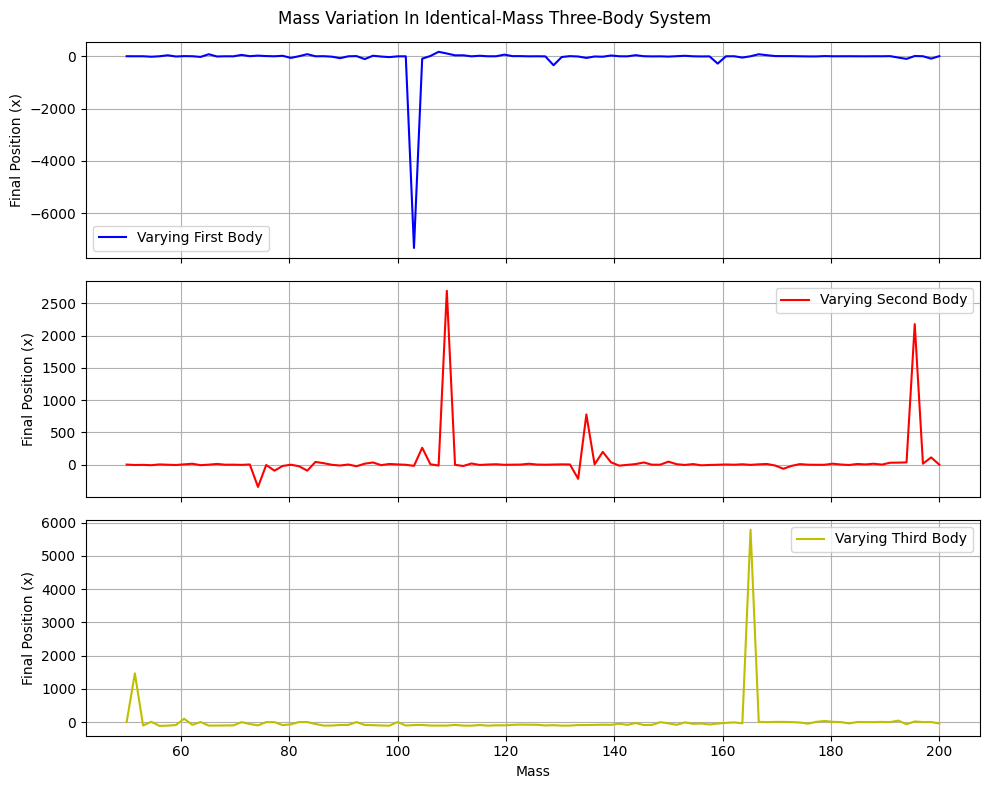

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(10,8), sharex=True)

axs[0].plot(mass_arr, final_positions_identical_1[:,0], 'b', label='Varying First Body')
axs[0].set_ylabel('Final Position (x)')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(mass_arr, final_positions_identical_2[:,0], 'r', label='Varying Second Body')
axs[1].set_ylabel('Final Position (x)')
axs[1].legend()
axs[1].grid(True)

axs[2].plot(mass_arr, final_positions_identical_3[:,0], 'y', label='Varying Third Body')
axs[2].set_xlabel('Mass')
axs[2].set_ylabel('Final Position (x)')
axs[2].legend()
axs[2].grid(True)

plt.suptitle('Mass Variation In Identical-Mass Three-Body System')
plt.tight_layout()

---
Moving on, we'd like to implement a similar approach to test the sensitivity of three-body systems of identical mass to slight changes in the initial positions of the three bodies. Below is a plot that shows the final positions, both in the x and y directions, plotted against the initial position of each body over 25 different points. Every trial holds two bodies constant at the same initial position, and varies the remaining body.

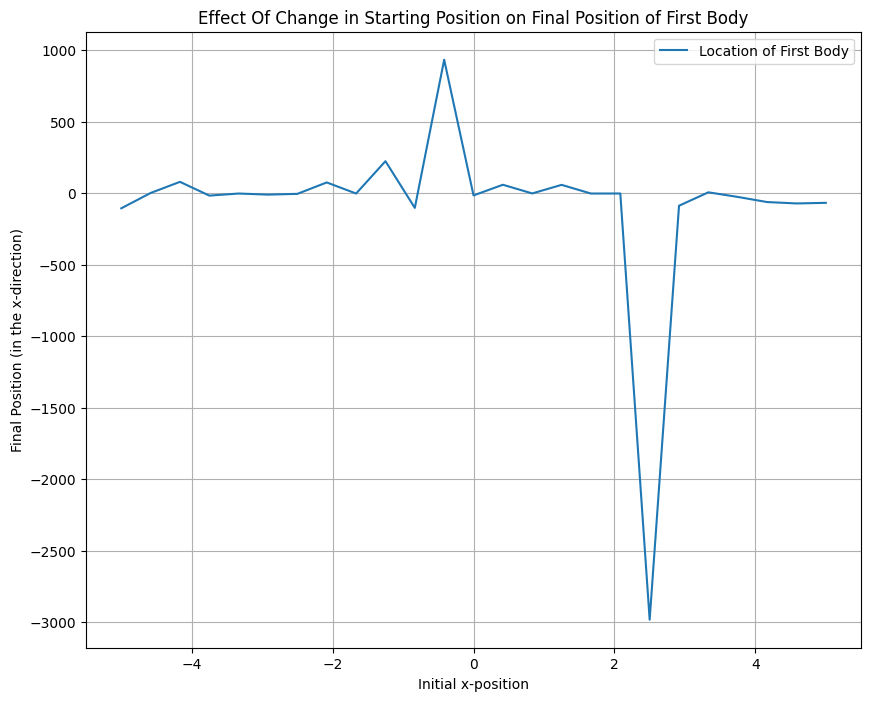

In [ ]:
identical_mass_100 = [100,100,100]
N_points = 25
t_span = (0,20)
x_pos = np.linspace(-5,5,N_points)
y_pos = np.linspace(-5,5,N_points)
final_positions1 = np.zeros((N_points,2))  # To store final positions for each simulation
final_positions2 = np.zeros((N_points,2))  # To store final positions for each simulation
final_positions3 = np.zeros((N_points,2))  # To store final positions for each simulation

for i in range(N_points):
  for j in range(N_points):
      #m1start[i,j] = (x_pos[i],y_pos[j]) # Updates the position of the first body for each simulation
      ### Initial Conditions ###
      r1_0 = np.array([x_pos[i], y_pos[j]])
      v1_0 = np.array([0, 0])

      r2_0 = np.array([-1, -2])
      v2_0 = np.array([0, 0])

      r3_0 = np.array([-1, 1])
      v3_0 = np.array([0, 0])

      initial_conditions = np.concatenate((r1_0, v1_0, r2_0, v2_0, r3_0, v3_0))
      solution_N_points = solve_ivp(lambda t, y: three_body_equations(t, y, identical_mass_100), t_span, initial_conditions, method='RK45', t_eval=np.linspace(0, 20, 500))
      r1_solution = solution_N_points.y[0:2, :] # Extract position
      r2_solution = solution_N_points.y[2:4, :] # Extract position
      r3_solution = solution_N_points.y[4:6, :] # Extract position
      final_positions1[i] = r1_solution[:, -1] # Store final position of each iteration
      final_positions2[i] = r2_solution[:, -1] # Store final position of each iteration
      final_positions3[i] = r3_solution[:, -1] # Store final position of each iteration


plt.figure(figsize=(10, 8))
plt.plot(x_pos, final_positions1[:,0], label='Location of First Body')
plt.xlabel('Initial x-position')
plt.ylabel('Final Position (in the x-direction)')
plt.title('Effect Of Change in Starting Position on Final Position of First Body')
plt.legend()
plt.grid(True)

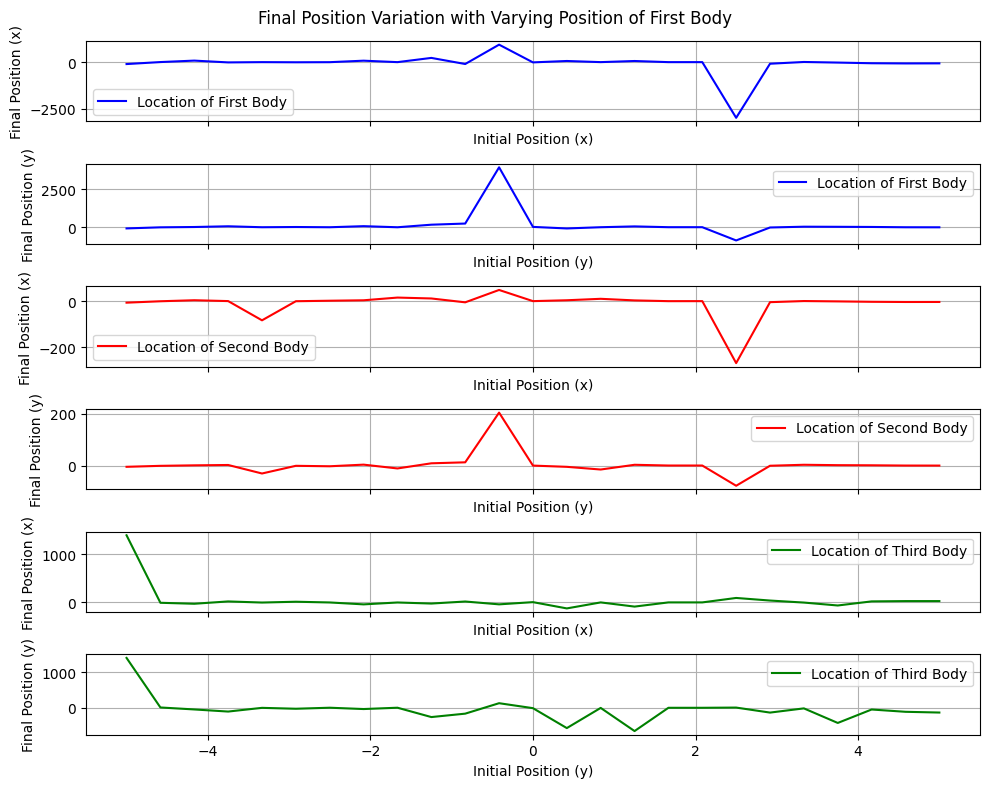

In [ ]:
# plot (x,y) positions separately for the three bodies (6 plots total)
fig, axs = plt.subplots(6, 1, figsize=(10,8), sharex=True)

axs[0].plot(x_pos, final_positions1[:,0], 'b', label='Location of First Body')
axs[0].set_xlabel('Initial Position (x)')
axs[0].set_ylabel('Final Position (x)')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(y_pos, final_positions1[:,1], 'b', label='Location of First Body')
axs[1].set_xlabel('Initial Position (y)')
axs[1].set_ylabel('Final Position (y)')
axs[1].legend()
axs[1].grid(True)

axs[2].plot(x_pos, final_positions2[:,0], 'r', label='Location of Second Body')
axs[2].set_xlabel('Initial Position (x)')
axs[2].set_ylabel('Final Position (x)')
axs[2].legend()
axs[2].grid(True)

axs[3].plot(y_pos, final_positions2[:,1], 'r', label='Location of Second Body')
axs[3].set_xlabel('Initial Position (y)')
axs[3].set_ylabel('Final Position (y)')
axs[3].legend()
axs[3].grid(True)

axs[4].plot(x_pos, final_positions3[:,0], 'g', label='Location of Third Body')
axs[4].set_xlabel('Initial Position (x)')
axs[4].set_ylabel('Final Position (x)')
axs[4].legend()
axs[4].grid(True)

axs[5].plot(y_pos, final_positions3[:,1], 'g', label='Location of Third Body')
axs[5].set_xlabel('Initial Position (y)')
axs[5].set_ylabel('Final Position (y)')
axs[5].legend()
axs[5].grid(True)

plt.suptitle('Final Position Variation with Varying Position of First Body')
plt.tight_layout()

---

## Discussion & Critique

#### One of our goals was to implement Kepler's Second Law into the system's motion to model the bodies speeding up and slowing down based on thier position in orbit. This could have been done through writing a custom function in the Manim classes. Due to time constraints and our unfamiliarity with Manim's syntax, we weren't able to implement that. However, such addition only contributes to the overall aesthetics of our animation, which is a secondary goal.  

#### Another issue is runtime. To get an accurate representation of the trajectories in Manim, we need a very large N. Large N takes > 1 hours to compute, which was an obstacle due to time constraints. This also applied to making minor changes to any of the code. In order to run any cells in Colab, the notebook must be restarted and all methods imported again. This meant that for Manim, waiting upwards of 10 minutes just to be able to change code, and then a few more to be able to see it.

#### Lastly, three-body systems are chaotic. They are extremely sensitive to initial conditions, any slight change in the initial conditions of one or more bodies leads to a drastically different behavior. Without an educated guess of the initial configurations, most systems will just break apart and produce unphysical results. Given the long processing times for large N, it was inconvenient, and extremely difficult at times, to experiment with random configurations.
---